In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import SpectralClustering

In [3]:
# Read data
train_data = pd.read_table("train_data.tsv")

# sample label information
train_label = pd.read_table("train_label.tsv")

In [4]:
train_data

,Unnamed: 0,S1186,S1187,S1188,S1189,S1190,S1191,S1193,S1194,S1195,...,S990,S991,S992,S993,S994,S995,S996,S997,S998,S999
0,A1BG,5.95,5.54,6.76,9.39,7.18,7.52,6.38,5.78,7.06,...,7.74,7.31,6.67,6.14,5.06,6.36,4.70,6.81,4.11,2.73
1,A1CF,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,5.33,0.00,0.00,7.55,0.00,8.73,7.99
2,A2M,12.67,13.09,14.00,12.97,17.84,13.58,13.52,12.83,12.32,...,16.44,13.81,13.06,15.40,13.84,13.13,15.14,14.85,14.45,15.42
3,A2ML1,10.51,1.07,1.11,0.00,1.67,1.70,0.00,8.77,0.75,...,0.82,7.15,0.88,0.79,0.00,1.38,0.40,4.85,0.00,0.00
4,A4GALT,6.08,7.56,8.34,6.47,6.75,9.21,6.68,7.56,6.20,...,9.65,8.41,6.62,9.60,9.07,8.30,10.54,8.05,10.92,9.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16335,ZYG11A,7.35,6.54,2.03,5.70,6.20,4.89,5.10,4.99,7.59,...,4.67,7.80,6.76,0.79,0.00,6.44,4.11,5.69,7.03,0.64
16336,ZYG11B,9.44,9.18,9.37,9.53,10.13,9.17,9.12,9.67,9.63,...,9.86,10.64,10.25,10.58,9.47,10.14,9.91,10.13,10.17,10.79
16337,ZYX,11.56,11.64,11.51,11.29,13.38,12.92,11.56,11.85,11.23,...,13.10,12.35,11.05,11.33,11.78,10.97,11.75,12.08,11.68,11.61
16338,ZZEF1,10.37,9.22,11.06,9.55,9.50,9.66,9.57,10.43,10.78,...,10.69,10.07,10.93,10.28,8.81,10.68,10.26,10.97,8.92,10.30


breast -> 0
kidney -> 1
lung adenocarcinoma  -> 2

In [5]:
train_label

,Unnamed: 0,id,X_primary_disease
0,S1186,S1186,breast invasive carcinoma
1,S1187,S1187,breast invasive carcinoma
2,S1188,S1188,breast invasive carcinoma
3,S1189,S1189,breast invasive carcinoma
4,S1190,S1190,breast invasive carcinoma
...,...,...,...
1840,S995,S995,breast invasive carcinoma
1841,S996,S996,kidney clear cell carcinoma
1842,S997,S997,breast invasive carcinoma
1843,S998,S998,kidney clear cell carcinoma


In [39]:
samples = train_data.columns.values
X = train_data.to_numpy().transpose()
features = X[0]
X = pd.DataFrame(X[1:,], columns = features, index = samples[1:])
X

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
S1186,5.95,0.0,12.67,10.51,6.08,1.36,8.94,9.1,0.0,0.0,...,9.31,9.96,5.25,8.17,9.44,7.35,9.44,11.56,10.37,10.2
S1187,5.54,0.45,13.09,1.07,7.56,1.3,8.87,9.69,1.84,0.0,...,8.96,10.21,5.83,9.1,10.39,6.54,9.18,11.64,9.22,8.84
S1188,6.76,0.0,14.0,1.11,8.34,1.55,9.2,9.94,0.0,0.0,...,8.52,8.84,6.94,9.98,10.36,2.03,9.37,11.51,11.06,11.17
S1189,9.39,0.0,12.97,0.0,6.47,0.0,9.97,10.2,0.54,0.0,...,9.78,8.92,5.13,8.4,10.35,5.7,9.53,11.29,9.55,9.25
S1190,7.18,0.0,17.84,1.67,6.75,2.6,8.5,9.54,0.0,0.0,...,8.73,9.72,6.13,9.11,10.76,6.2,10.13,13.38,9.5,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S995,6.36,0.0,13.13,1.38,8.3,0.62,9.48,10.13,0.0,0.0,...,8.78,9.14,6.44,9.37,10.36,6.44,10.14,10.97,10.68,10.66
S996,4.7,7.55,15.14,0.4,10.54,1.19,9.11,9.33,0.0,0.4,...,7.26,7.95,6.72,8.93,10.31,4.11,9.91,11.75,10.26,9.63
S997,6.81,0.0,14.85,4.85,8.05,1.06,9.01,9.62,3.77,1.66,...,8.69,8.39,6.6,9.14,10.45,5.69,10.13,12.08,10.97,10.17
S998,4.11,8.73,14.45,0.0,10.92,3.94,9.33,9.01,0.55,0.0,...,6.61,6.57,7.12,8.63,9.93,7.03,10.17,11.68,8.92,9.52


In [7]:
y = train_label.drop(columns = ["Unnamed: 0","id"])
y = y.set_index(samples[1:])
y

,X_primary_disease
S1186,breast invasive carcinoma
S1187,breast invasive carcinoma
S1188,breast invasive carcinoma
S1189,breast invasive carcinoma
S1190,breast invasive carcinoma
...,...
S995,breast invasive carcinoma
S996,kidney clear cell carcinoma
S997,breast invasive carcinoma
S998,kidney clear cell carcinoma


In [9]:
# replace names with integers
for i in range(0,(len(samples[1:]))):
    if y.iat[i,0] == 'breast invasive carcinoma':
        y.iat[i,0] = 0
    elif y.iat[i,0] == 'kidney clear cell carcinoma':
        y.iat[i,0] = 1
    else:
        y.iat[i,0] = 2
        

In [8]:
# model = RandomForestRegressor(random_state=0, max_depth=2)
# # X = pd.get_dummies(X)
# model.fit(X, list(Y))
# importances = model.feature_importances_

In [13]:
y = list(y.iloc[:,0])

In [40]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [24]:
# sample label information
test_data = pd.read_table("test_data.tsv")
test_data

,Unnamed: 0,S1,S1001,S1003,S1005,S1006,S1012,S1020,S1021,S1037,...,S1164,S1166,S1168,S1172,S1173,S1174,S1175,S1179,S1180,S1184
0,A1BG,7.23,6.61,5.67,5.22,5.11,4.53,4.65,8.15,7.35,...,6.58,6.81,7.30,8.61,6.92,4.91,6.29,4.88,6.09,8.58
1,A1CF,0.87,0.00,0.00,0.00,0.00,0.85,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.96,0.00,0.00,0.00
2,A2M,15.30,13.58,14.64,15.10,11.81,13.77,14.56,14.12,14.63,...,14.46,13.39,12.45,13.78,14.27,15.31,14.50,13.54,14.57,13.79
3,A2ML1,0.87,0.59,0.00,1.38,1.02,3.94,1.31,2.66,2.66,...,4.94,3.17,0.91,10.65,3.57,3.35,0.96,1.61,1.41,1.08
4,A4GALT,9.69,8.21,8.00,7.64,10.39,10.33,8.13,10.00,9.63,...,7.41,7.46,6.30,9.20,8.00,9.07,8.27,5.92,7.26,7.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16335,ZYG11A,1.41,7.37,5.81,2.89,7.02,0.85,5.76,5.50,7.43,...,6.18,8.41,5.80,7.00,6.90,8.09,5.97,6.17,7.13,6.09
16336,ZYG11B,9.81,10.45,9.55,10.28,8.88,9.80,9.78,10.03,9.77,...,10.25,9.80,9.85,8.92,10.14,10.28,9.49,10.29,10.41,9.46
16337,ZYX,12.04,11.61,12.77,11.66,11.96,12.12,12.81,11.42,12.21,...,11.19,11.70,10.82,12.97,11.40,12.56,12.42,10.62,11.20,12.12
16338,ZZEF1,10.15,10.20,9.78,10.35,10.38,10.07,10.00,10.52,10.42,...,10.46,10.45,10.99,8.79,10.56,10.78,9.39,11.25,11.17,9.24


In [25]:
test_samples = test_data.columns.values
test_data = test_data.to_numpy().transpose()
test_features = list(test_data[0])
test_data = pd.DataFrame(test_data[1:,], columns = test_features, index = test_samples[1:])
test_data

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
S1,7.23,0.87,15.3,0.87,9.69,2.68,9.43,9.33,6.04,0.0,...,8.33,10.31,5.28,8.16,10.94,1.41,9.81,12.04,10.15,9.94
S1001,6.61,0.0,13.58,0.59,8.21,0.59,8.42,9.8,2.18,0.0,...,9.09,7.48,7.19,10.06,10.81,7.37,10.45,11.61,10.2,10.06
S1003,5.67,0.0,14.64,0.0,8.0,0.89,9.05,8.45,6.03,0.0,...,8.59,9.25,5.13,7.97,9.92,5.81,9.55,12.77,9.78,9.6
S1005,5.22,0.0,15.1,1.38,7.64,1.77,9.08,9.67,5.59,0.85,...,8.36,7.38,5.95,8.11,10.2,2.89,10.28,11.66,10.35,9.89
S1006,5.11,0.0,11.81,1.02,10.39,0.0,9.94,10.71,6.93,0.6,...,8.98,10.37,4.94,8.43,9.79,7.02,8.88,11.96,10.38,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1174,4.91,0.0,15.31,3.35,9.07,1.23,8.41,10.62,3.05,0.0,...,10.24,11.58,6.07,8.98,10.58,8.09,10.28,12.56,10.78,10.55
S1175,6.29,0.96,14.5,0.96,8.27,0.0,9.53,10.63,0.96,0.0,...,8.37,9.72,5.11,8.72,9.5,5.97,9.49,12.42,9.39,9.09
S1179,4.88,0.0,13.54,1.61,5.92,0.3,9.69,9.76,0.3,0.0,...,10.3,9.65,7.04,10.27,10.56,6.17,10.29,10.62,11.25,9.78
S1180,6.09,0.0,14.57,1.41,7.26,0.87,9.67,9.56,5.62,0.0,...,8.63,7.64,7.1,9.81,10.63,7.13,10.41,11.2,11.17,10.51


In [26]:
LR = LogisticRegression(random_state=22, solver='sag', multi_class='multinomial', max_iter=10000).fit(X_train, y_train)

In [27]:
LR.predict(test_data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.9973

In [18]:
LR.predict(X_test)

array([0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2,
       0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0,

<ipython-input-37-9b484559b25d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result'] = y_test


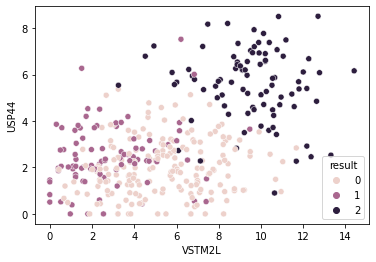

<Figure size 1440x1440 with 0 Axes>

In [37]:
df = X_test
df['result'] = y_test
sns.scatterplot(data=df, y="USP44", x="VSTM2L", hue='result')
plt.figure(figsize=(20,20))
plt.show()

<ipython-input-41-a181be6b2782>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result'] = LR.predict(X_test)


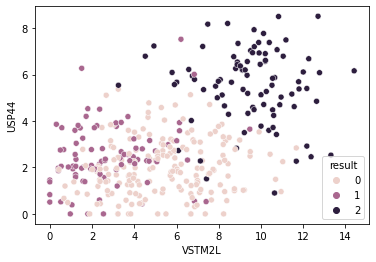

<Figure size 1440x1440 with 0 Axes>

In [41]:
df = X_test
df['result'] = LR.predict(X_test)
sns.scatterplot(data=df, y="USP44", x="VSTM2L", hue='result')
plt.figure(figsize=(20,20))
plt.show()

# Feature Selection 

In [42]:
# get importance
importance = LR.coef_
# final 300 features
final_features = list()
final_features_val = list()
# select 100 top features for each cluster
selected_features = list()
selected_features_values = list()

breast invasive carcinoma

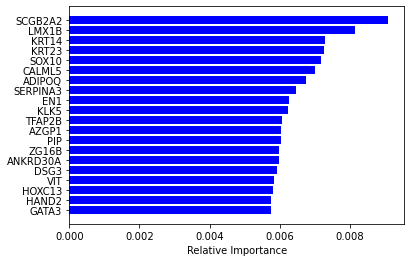

In [43]:
# plot feature importance
features = X.columns
indices = np.argsort(importance)[0,-20:]  # top 20 features
plt.barh(range(len(indices)), importance[0,indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
indices = np.argsort(importance)[0,-100:]
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importance[0,indices[i]])
final_features = np.append(final_features, selected_features)
final_features_val = np.append(final_features_val, selected_features_values)

kidney clear cell carcinoma

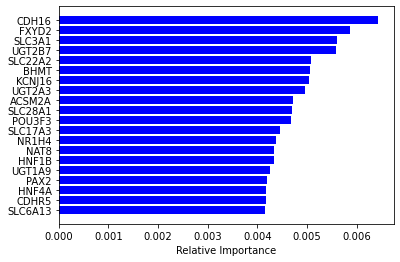

In [44]:
# plot feature importance
selected_features = list()
selected_features_values = list()
features = X.columns
indices = np.argsort(importance)[1,-20:]  # top 20 features
plt.barh(range(len(indices)), importance[1,indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# axes[0].set_title('Feature Importances ')
plt.show()

indices = np.argsort(importance)[1,-100:]
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importance[1,indices[i]])
final_features = np.append(final_features, selected_features)
final_features_val = np.append(final_features_val, selected_features_values)

lung adenocarcinoma

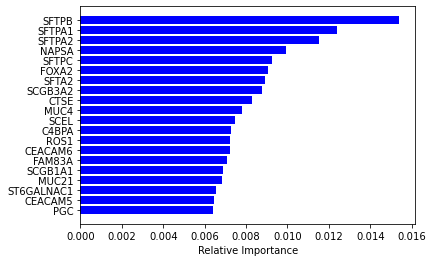

In [45]:
# plot feature importance
selected_features = list()
selected_features_values = list()
features = X.columns
indices = np.argsort(importance)[2,-20:]  # top 20 features
plt.barh(range(len(indices)), importance[2,indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# axes[0].set_title('Feature Importances ')
plt.show()

indices = np.argsort(importance)[2,-100:]
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importance[2,indices[i]])
final_features = np.append(final_features, selected_features)
final_features_val = np.append(final_features_val, selected_features_values)

In [46]:
len(final_features)

300

In [47]:
final_features_pd = pd.DataFrame(data=final_features_val, columns=["correlation"], index=final_features)
final_features_pd

,correlation
IRX4,0.003766
MYBPC1,0.003770
AK5,0.003781
STAC2,0.003786
PYDC1,0.003793
...,...
SFTPC,0.009239
NAPSA,0.009917
SFTPA2,0.011536
SFTPA1,0.012371


# Retraining data with correlated features

In [48]:
# drop duplicated features
final_columns = list(final_features_pd.index.drop_duplicates())

X_train = X_train[X_train.columns.intersection(final_columns)]
X_test = X_test[X_test.columns.intersection(final_columns)]
test_data = test_data[test_data.columns.intersection(final_columns)]

In [64]:
LR1 = LogisticRegression(random_state=0, solver='sag', multi_class='multinomial', max_iter=5000).fit(X_train, y_train)

In [63]:
LR1.predict(X_test)
round(LR1.score(X_test,y_test),4)

0.9973

In [52]:
result = pd.DataFrame(LR1.predict(test_data), columns=['result'], index = test_data.index)

In [53]:
result_name = list()

In [54]:
# replace integers with names
for i in range(0,(len(result))):
    if int(result.iat[i,0]) == 0:
        result_name = np.append(result_name,'breast invasive carcinoma')
    elif int(result.iat[i,0]) == 1:
        result_name = np.append(result_name,'kidney clear cell carcinoma')
    else:
        result_name = np.append(result_name, "lung adenocarcinoma")

In [55]:
result = pd.DataFrame(result_name, columns=['result'], index = test_data.index)

In [56]:
result

,result
S1,lung adenocarcinoma
S1001,lung adenocarcinoma
S1003,lung adenocarcinoma
S1005,lung adenocarcinoma
S1006,lung adenocarcinoma
...,...
S1174,breast invasive carcinoma
S1175,breast invasive carcinoma
S1179,breast invasive carcinoma
S1180,breast invasive carcinoma


In [57]:
result.to_csv('ML_predict_Ayazbakhsh.csv')

In [58]:
clustering = AgglomerativeClustering(n_clusters = 3).fit_predict(X_train)

In [59]:
clustering

array([2, 0, 1, ..., 0, 0, 1], dtype=int64)

In [66]:
accuracy_score(clustering, y_train)

0.9857723577235772